# CMPE-259 Transformer Homework

## Professor Jorjeta Jetcheva, T.A. Hardy Leung

### Copyright 2023. All Right Reserved

Welcome to the transformer assignment! This assignment is made of four parts. Part I, II, III are tutorials on tensors, PyTorch, and transformer. Part IV is the actual coding. You only need to write code for Part IV.

The purpose of this assignment is to allow you to get as proficient with the transformer architecture as possible, starting only with decent Python coding skills and a basic understanding of deep learning at a higher level. You probably have _used_ or _adapted_ Keras or PyTorch codes in previous class projects starting with sample code, but it is not a requirement that you have _written_ your own PyTorch code.

You will implement the transformer model on PyTorch almost from scratch, with a minimum amount of external dependencies other than the PyTorch framework and some pre-built modules. Since we are learning about natural language processing, you would have some more idea about embedding and the concept of auto-regressive next-token prediction. You need have a high-level understanding of how transformer works. If not, it is worth your time reading the seminal paper on transformer, "*Attention is All You Need*" by Vaswani et al. https://arxiv.org/pdf/1706.03762.pdf

Hopefully, by the end of this transformer assignment, you will have developed quite a bit of confidence and ability as a professional deep learning practioner or researcher, instead of getting stuck at copying or adapting others' code.

It is strongly advised that you work on this assignment instead of looking up existing transformer implementation -- yes there are existing code out there, though some are very complicated. In fact, if you are not careful, you may end up spending even more time looking at existing code, and at the same time you rob yourself of a great learning opportunity.

Part I and II will get you familiar with the basics of tensors and PyTorch. Don't skip it even if you think you know the materials. Some of them are quite advanced and necessary for transformer implementation.

Part III talks about the mechanics of the transformer, mostly from an implementation perspective.

You don't need to submit anything for Parts I, II, and III.

Part IV is where the actual coding is. Search for the word `FIXME`, and make the appropriate changes. Part IV is further divided into many parts, as we will work on the building blocks towards the end-game of writing a fully functional transformer module. You'll be given instructions along the way. Verification functions are provided so that you know you have implemented each part correctly.

Let's go!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from tqdm import tqdm

In [ ]:
torch.manual_seed(42)  # this is to ensure deterministic behavior

---

# [Exercise] Part 4 -- Transformer Implementation

Now we have all the tools to implement transformer, as shown in the following diagram (from the paper "Attention is All You Need" https://arxiv.org/pdf/1706.03762.pdf

---

## 4.1 -- Positional Encoding

Let's start with the positional encoding as a warm-up. You don't need to do anything here, but pay attention to how the information flows, as well as the shapes of the tensors along the way.

This module takes the input which has been embedded in D-dimension per token, and there are `L` tokens (up to `maxL`). The shape of the tensor for a single input sequence therefore is therefore `[L, D]`, and according to the Transformer paper, there should be a matching positional encoding, also of shape `[L, D]`, whose elements should be defined as follows (paper section 3.5):

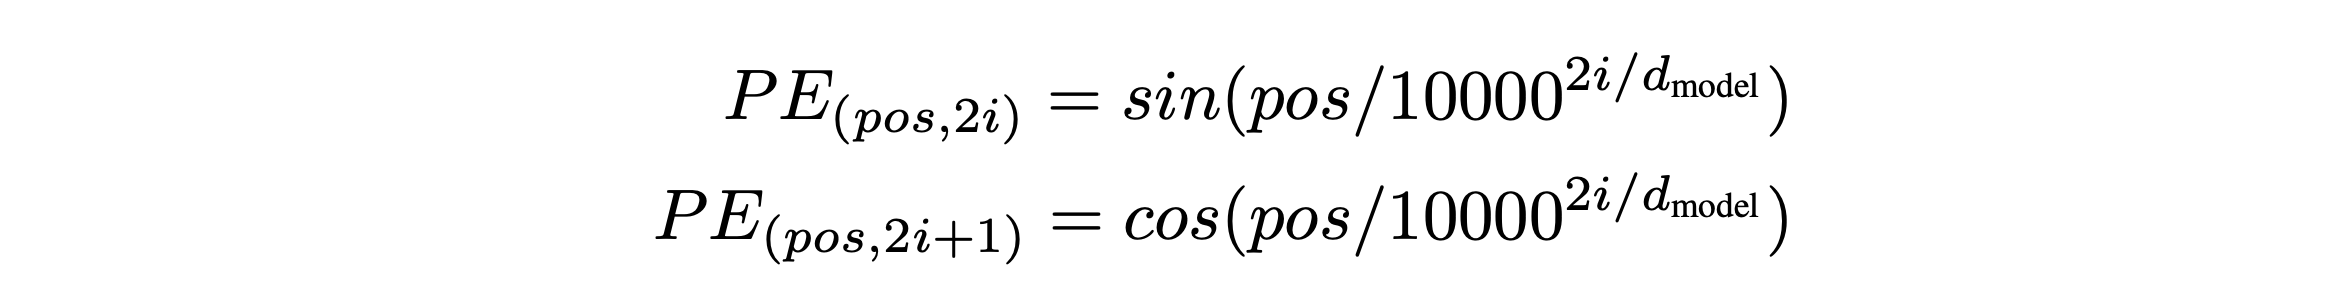

For your convenience, the following Python function can build such positional encoding for you, using matrix manipulation:

```
def positional_encoding_function(maxL, D):
        pe = torch.zeros(maxL, D)
            # pe measures (maxL, D)
        position = torch.arange(0, maxL).unsqueeze(1)
            # (maxL) --> (maxL, 1) via unsqueeze(1)
        coeff = torch.exp(torch.arange(0, D, 2).float() * -(math.log(10000.0) / D))
        
        pe[:, 0::2] = torch.sin(position * coeff)  # fill in even positions
        pe[:, 1::2] = torch.cos(position * coeff)  # fill in odd positions
        return pe
 ```
 
Now, your job is to implement the module `PositionalEmbedding`, which simply take the input, and _add_ the output of the positional embedding to it, and return. Note that the input would be a tensor of shape `[B, L, D]`, where `B` is the batch size, `L` is the length of the each input token sequence. Note that all of the input token sequences must have the same length, with padding if necessary, and `L` must be less than or equal to `maxL` which is set when we construct the `PositionalEmbedding` object.
 
To make this assignment as easy as possible, we provide a function called `verify_positional_encoding()` just so you would know if you get it right or not. Pay attention to the fact that the input length may be
smaller than `maxL`. You may need to use the Python subrange functionalities.

In [ ]:
def positional_encoding_function(maxL, D):
        pe = torch.zeros(maxL, D)
            # pe measures (maxL, D)
        position = torch.arange(0, maxL).unsqueeze(1)
            # (maxL) --> (maxL, 1) via unsqueeze(1)
        coeff = torch.exp(torch.arange(0, D, 2).float() * -(math.log(10000.0) / D))
        
        pe[:, 0::2] = torch.sin(position * coeff)  # fill in even positions
        pe[:, 1::2] = torch.cos(position * coeff)  # fill in odd positions
        return pe

In [ ]:
positional_encoding_function(10, 4)

In [ ]:
# FIXME: please implement this custom PyTorch model. To support batching,
#        the shape of self.pe must be [1, maxL, D]

class PositionalEncoding(nn.Module):
    def __init__(self, D, maxL):
        super(PositionalEncoding, self).__init__()
        self.pe = 0  # FIXME
    def forward(self, x):
        return 0  # FIXME

In [ ]:
def verify_positional_encoding():
    d = 4
    L = 10
    positional_encoding = PositionalEncoding(d, L)
    
    if positional_encoding.pe.shape != torch.Size([1, L, d]):
        print("** failed (unexpected self.pe shape) **")
        return
    
    input = torch.tensor([[[0.2431, 0.4980, 0.7206, 0.3775],
         [0.4099, 0.6627, 0.4661, 0.6243],
         [0.0589, 0.3667, 0.1145, 0.1267],
         [0.1336, 0.8447, 0.0353, 0.6310],
         [0.4305, 0.3908, 0.7980, 0.1252]],

        [[0.7211, 0.7129, 0.1923, 0.6771],
         [0.4786, 0.1531, 0.0267, 0.5136],
         [0.1609, 0.2147, 0.3886, 0.6307],
         [0.0440, 0.2393, 0.9905, 0.3157],
         [0.3681, 0.7550, 0.4471, 0.2478]],

        [[0.2217, 0.3223, 0.1107, 0.5803],
         [0.0943, 0.3119, 0.4668, 0.4528],
         [0.9580, 0.6907, 0.6251, 0.5495],
         [0.3926, 0.9498, 0.2189, 0.0112],
         [0.5274, 0.9410, 0.9193, 0.1334]]])
    expected_output = torch.tensor([[[ 0.2431,  1.4980,  0.7206,  1.3775],
         [ 1.2514,  1.2030,  0.4761,  1.6242],
         [ 0.9682, -0.0494,  0.1345,  1.1265],
         [ 0.2747, -0.1453,  0.0653,  1.6306],
         [-0.3263, -0.2628,  0.8380,  1.1244]],

        [[ 0.7211,  1.7129,  0.1923,  1.6771],
         [ 1.3201,  0.6934,  0.0367,  1.5136],
         [ 1.0702, -0.2014,  0.4086,  1.6305],
         [ 0.1851, -0.7507,  1.0205,  1.3153],
         [-0.3887,  0.1014,  0.4871,  1.2470]],

        [[ 0.2217,  1.3223,  0.1107,  1.5803],
         [ 0.9358,  0.8522,  0.4768,  1.4527],
         [ 1.8673,  0.2746,  0.6451,  1.5493],
         [ 0.5337, -0.0402,  0.2489,  1.0108],
         [-0.2294,  0.2874,  0.9593,  1.1326]]])
    
    print(f'input = {input}')
    print(f'input.shape = {input.shape}')
    print('----------------------------------------------------------------')
    output = positional_encoding(input)
    print(f'output = {output}')
    print(f'output.shape = {output.shape}')
    print('----------------------------------------------------------------')
    print(f'expected_output = {expected_output}')
    print(f'expected_output.shape = {expected_output.shape}')
    print('----------------------------------------------------------------')
    if output.shape != expected_output.shape or \
            torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_positional_encoding() **")
    
verify_positional_encoding()

---

## [Exercise] 4.2 -- Feed-Forward

Another module that is described in the Attention paper is a feed-forward module (section 3.3) -- it is made of "two linear transformations with a ReLU activation inbetween".

It would be good if you can translate this directly into code. If not, here is the flow:

```
input --> linear(D, D_ff) --> ReLU   --> linear(D_ff, D) --> output
          (fc1)               (relu)     (fc2)
```

Also make sure you can handle batches, i.e. you would expect the input to have a shape that is `[B, L, D]`. Note that `D` and `D_ff` will be provided as input during the construction of the feed-forward object.

In [ ]:
# FIXME: please implement this custom PyTorch model. The constructor takes D
#        and D_ff, which are the size of the shape

class FeedForward(nn.Module):
    def __init__(self, D, D_ff):
        super(FeedForward, self).__init__()
        self.fc1 = 0 # FIXME
        self.fc2 = 0 # FIXME
        self.relu = 0 # FIXME

    def forward(self, x):
        return 0 # FIXME

In [ ]:
def verify_feed_forward():
    D = 4
    D_ff = 20
    L = 10
    feed_forward = FeedForward(D, D_ff)
        
    input = torch.tensor([[[0.2431, 0.4980, 0.7206, 0.3775],
         [0.4099, 0.6627, 0.4661, 0.6243],
         [0.0589, 0.3667, 0.1145, 0.1267],
         [0.1336, 0.8447, 0.0353, 0.6310],
         [0.4305, 0.3908, 0.7980, 0.1252]],

        [[0.7211, 0.7129, 0.1923, 0.6771],
         [0.4786, 0.1531, 0.0267, 0.5136],
         [0.1609, 0.2147, 0.3886, 0.6307],
         [0.0440, 0.2393, 0.9905, 0.3157],
         [0.3681, 0.7550, 0.4471, 0.2478]],

        [[0.2217, 0.3223, 0.1107, 0.5803],
         [0.0943, 0.3119, 0.4668, 0.4528],
         [0.9580, 0.6907, 0.6251, 0.5495],
         [0.3926, 0.9498, 0.2189, 0.0112],
         [0.5274, 0.9410, 0.9193, 0.1334]]])
    expected_output = torch.tensor([[[-0.0597,  0.0945,  0.0395, -0.2518],
         [-0.1087,  0.1272,  0.0404, -0.1591],
         [-0.0683,  0.0398, -0.0016, -0.1937],
         [-0.1594,  0.1681, -0.0724, -0.1056],
         [-0.0407,  0.0176,  0.0667, -0.2978]],

        [[-0.1535,  0.1135,  0.0863, -0.0775],
         [ 0.0179,  0.0418,  0.1095, -0.0774],
         [ 0.0021,  0.1400,  0.0694, -0.1814],
         [-0.0618,  0.0594,  0.1050, -0.2809],
         [-0.1225,  0.0564, -0.0130, -0.2060]],

        [[-0.0257,  0.1084,  0.0363, -0.1250],
         [-0.0230,  0.1223,  0.0449, -0.2151],
         [-0.1516,  0.0530,  0.1148, -0.1779],
         [-0.1689,  0.0216, -0.0733, -0.1875],
         [-0.1763,  0.0052, -0.0145, -0.3051]]])
    
    print(f'input = {input}')
    print(f'input.shape = {input.shape}')
    print('----------------------------------------------------------------')
    output = feed_forward(input)
    print(f'output = {output}')
    print(f'output.shape = {output.shape}')
    print('----------------------------------------------------------------')
    print(f'expected_output = {expected_output}')
    print(f'expected_output.shape = {expected_output.shape}')
    print('----------------------------------------------------------------')
    if output.shape != expected_output.shape or \
            torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_feed_forward() **")
    
verify_feed_forward()

---

## [Exercise] 4.3 -- Multi-Head Splitting and Combining

You heard about the term "multi-head" attention but do you know how it works? Conceptually, let's say we have a tensor that represents a token sequence of length `L` and dimension `D`. For example (for illustration only),
the following tensor represents a sequence of 12 tokens, with 6 dimensions each. The shape of the tensor is `[12, 6]`:

```
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47],
        [48, 49, 50, 51, 52, 53],
        [54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65],
        [66, 67, 68, 69, 70, 71]])
```

Many people misunderstood multi-head attention as merely installing multiple copies of the attention mechanism at the expense of higher memory and runtime requirement. That is not correct. Instead, the actual implementation of multi-head attention is to chop the tensor along the dimensions into multiple heads. For example, we can chop the above sequence into 3 heads. So instead of a tensor of shape `[12, 6]`, we have three tensors of shape `[12, 2]`. Moreover, you can look at the three tensors of shape `[12, 2]` as one tensor of shape `[3, 12, 2]`:

```
tensor([[[ 0,  1],
         [ 6,  7],
         [12, 13],
         [18, 19],
         [24, 25],
         [30, 31],
         [36, 37],
         [42, 43],
         [48, 49],
         [54, 55],
         [60, 61],
         [66, 67]],

        [[ 2,  3],
         [ 8,  9],
         [14, 15],
         [20, 21],
         [26, 27],
         [32, 33],
         [38, 39],
         [44, 45],
         [50, 51],
         [56, 57],
         [62, 63],
         [68, 69]],

        [[ 4,  5],
         [10, 11],
         [16, 17],
         [22, 23],
         [28, 29],
         [34, 35],
         [40, 41],
         [46, 47],
         [52, 53],
         [58, 59],
         [64, 65],
         [70, 71]]])
```

Does it make sense? Each of the three "heads" is a sequence of length `L`, each with one third of the original dimensions (which is required to be evenly divisible by the number of heads).

How do you do this? Note that this can be accomplished with some PyTorch tensor manipulation as shown before, but it is not as easy as calling `reshape()`, because the ordering of elements would be wrong.

In the following, you need to implement two functions, `split_heads()` and `combine_heads()` to prepare the data for the multi-head attention mechanism. Both functions need to support batching, namely the input is not just a tensor, but a batch of tensors. More specifically,

`split_heads()` -- this functions takes in a tensor of shape `[B, L, D]`, and a parameter called `H`, where `B` is the batch size, `L` is the length of the token sequence, `D` is the dimension of each token, and return a tensor of shape `[B, H, L, Dh]`, where `Dh` is `D` divided by `h` (integer division). For example, you could start with a batch of 16 sequences, each of which is 1024 tokens long, and each token has an embedding dimension of 256. You call `split_heads()` to split the tensor into 8 heads. The result is a batch of 16 8-header tensors, each of which is 1024 tokens long, and each token has an embedding dimension of 32:

```
[16, 1024, 256] --> [16, 8, 1024, 32]
```

`combine_heads()` -- this function reverses the process of `split_heads()`.

In [ ]:
# FIXME: please implement split_heads() and combine_heads()

def split_heads(input, H):  # tensor shape is [B, L, D]
    return 0 # FIXME

def combine_heads(input):  # tensor shape is [B, H, L, D]
    return 0 # FIXME

In [ ]:
def verify_split_combine_heads():
    A = torch.tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35],
         [36, 37, 38, 39, 40, 41],
         [42, 43, 44, 45, 46, 47]],

        [[48, 49, 50, 51, 52, 53],
         [54, 55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64, 65],
         [66, 67, 68, 69, 70, 71]]])
    
    B = torch.tensor([[[[ 0,  1],
          [ 6,  7],
          [12, 13],
          [18, 19]],

         [[ 2,  3],
          [ 8,  9],
          [14, 15],
          [20, 21]],

         [[ 4,  5],
          [10, 11],
          [16, 17],
          [22, 23]]],


        [[[24, 25],
          [30, 31],
          [36, 37],
          [42, 43]],

         [[26, 27],
          [32, 33],
          [38, 39],
          [44, 45]],

         [[28, 29],
          [34, 35],
          [40, 41],
          [46, 47]]],


        [[[48, 49],
          [54, 55],
          [60, 61],
          [66, 67]],

         [[50, 51],
          [56, 57],
          [62, 63],
          [68, 69]],

         [[52, 53],
          [58, 59],
          [64, 65],
          [70, 71]]]])
    
    print("calling split_heads(input, 3), where input.shape = [3, 4, 6] ...")
    BB = split_heads(A, 3)
    
    print("calling combine_heads(input), where input.shape = [3, 3, 4, 2] ...")
    AA = combine_heads(B)
    
    if not torch.equal(B, BB):
        print("** failed split_heads() **")
        return
    if not torch.equal(A, AA):
        print("** failed combine_heads() **")
        return
    
    print('----------------------------------------------------------------')
    print("** passed verify_split_combine_heads() **")
    
verify_split_combine_heads()

---

## [Exercise] 4.4 -- Masking

The word `mask` appeared only twice in the "Attention is All You Need" paper, but is a significant concept in the transformer implementation, true to the saying that the devil is in the details. We decided to simply give you the full explanation, and provide the functions to generate the masks, so you don't need to do any work (yay!). For completeness, it is good to understand how masking works.

Let's start with the key equation that describes the inner working of transformer:

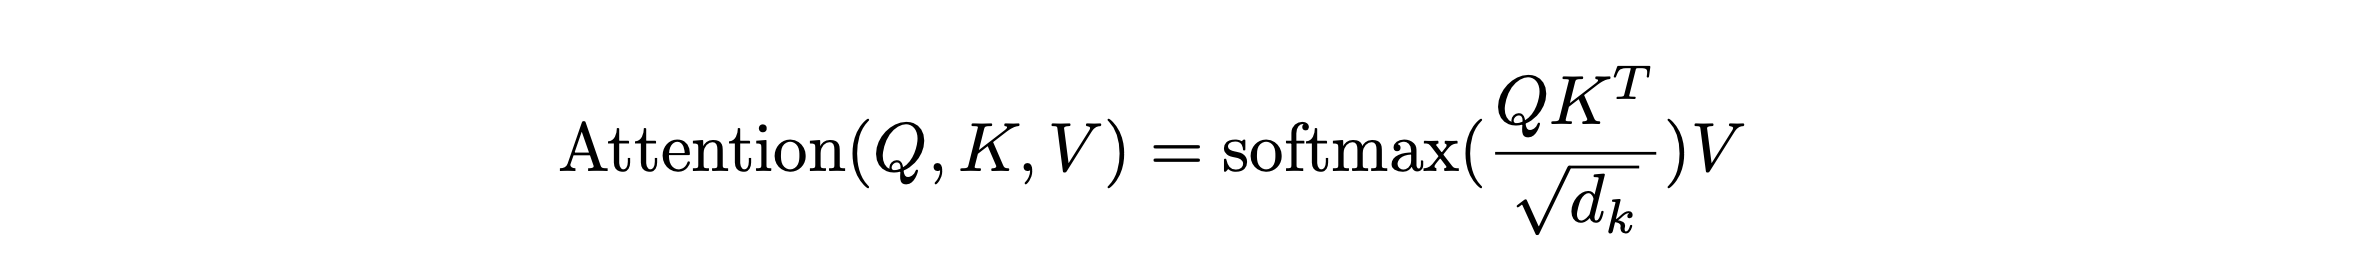

We had explained this concept before. You have a query tensor `Q`, a key tensor `K`, and a value tensor `V`.
The shapes of the tensors are `[B, L_q, D]`, `[B, L_kv, D]`, and `[B, L_kv, D]` respectively, for some
`L_q` and `L_kv` in the second dimension, and `D` in the third dimension. `B` is the size of the
batch, which for the purpose of this discussion, can be treated as a constant. Note that the query and the key tensors can have different shapes -- going back to Part III for more details.

The first attention module in the decoder requires special attention in order to ensure we don't peek into the unknown future. Think about how, during inference, the target tensor is incrementally constructed. Therefore, we need a mask to mask out all query-key pairs that are illegal (by setting the score to negative infinity). More
formally, we want a mask of shape `[L_q, L_k]` such that `mask[q, k] = 1` if this query-key pair is legal, and `mask[q, k] = 0` otherwise.


Let's take a look at all three attentions:

(1) encoder self-attention -- since we know the entire sequence of input already, there is no need to mask out anything. In transformer-speak, a token can attend to another token in the future, since we are talking about the source sequence.

(2) decoder self-attention -- note that the query and the key are from the same tensor, i.e. of shape `[L_q, L_q]`. The mask should be set such that `mask[q, k] = 1` if `q >= k`, and `mask[q, k] = 0` otherwise. Here, `1` is legal, and `0` is illegal. This can be achieved by:

```
def generate_causality_mask(target, debug=False):
    L = target.size(1)
    causality_mask = torch.tril(torch.ones(1, L, L), diagonal=0).int()
    return causality_mask
```

(3) decoder cross-attention -- there is no need for masking because the source tensor is known.

Later on, you can then use the function to mask out entries deemed illegal by replacing the illegal
entries with negative infinity (in practice, we use `-1e9`) using the torch function `masked_fill()`
(see an example below).

Note that, for tensor shape compatibility reason, the function that generate the causality mask
returns a tensor with a shape `[1, L, L]` instead of `[L, L]`.

In [ ]:
def generate_causality_mask(target):
    L = target.size(1)
    return torch.tril(torch.ones(1, L, L), diagonal=0).int()

In [ ]:
t = torch.tensor([[1.5, 0.2, 4.5, -1.2, 2.0]])

causality_mask = generate_causality_mask(t)
print(f'causality_mask = {causality_mask}')
print()
print(f'causality_mask.shape = {causality_mask.shape}')
print('----------------------------------------------------------------')

another_t = torch.arange(0, 25).reshape([1, 5, 5])
print(f'another_t = {another_t}')
print()
print(f'another_t.shape = {another_t.shape}')
print('----------------------------------------------------------------')
another_t_with_masking = another_t.masked_fill(causality_mask == 0, -1e9)
print(f'another_t_with_masking = {another_t_with_masking}')
print()
print(f'another_t_with_masking.shape = {another_t_with_masking.shape}')

In [ ]:
def verify_generate_causality_mask():
    t = torch.tensor([[1.4, 1.3, 2.5, 0.1, -1.3, 0.0]])
    causality_mask = generate_causality_mask(t)
    expected_causality_mask = torch.tensor([[[1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]]], dtype=torch.int32)
    if not torch.equal(causality_mask, expected_causality_mask):
        print("** failed generate_causality_mask() **")
        return
    
    print('----------------------------------------------------------------')
    print("** passed verify_generate_causality_mask() **")    
    
verify_generate_causality_mask()

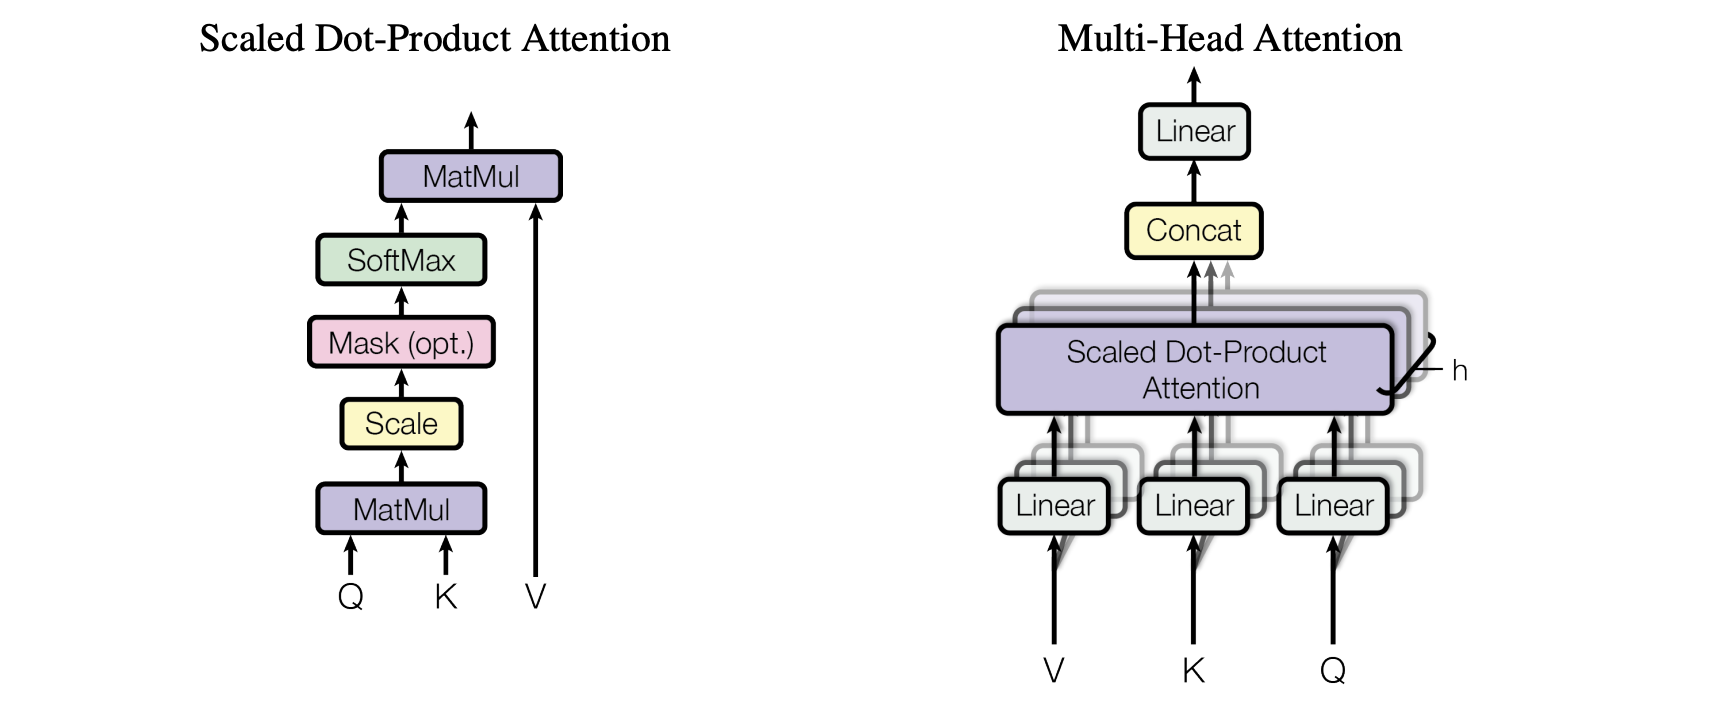

---


## [Exercise] 4.5 -- Scaled Dot-Product Attention

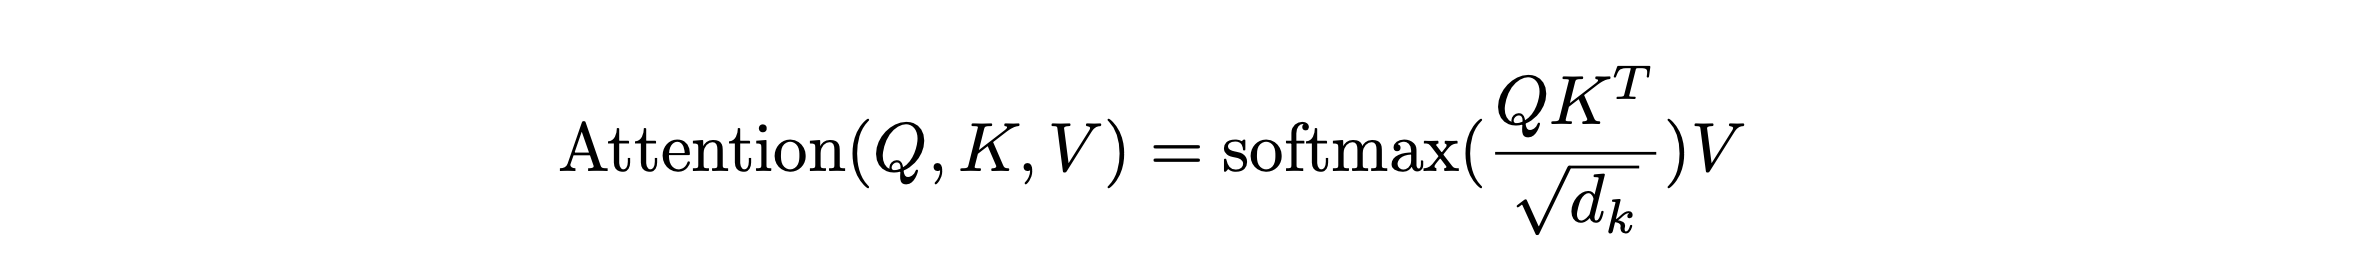


You shall now write an important function (not a module yet) called `scaled_dot_product_attention()`,
which takes in three tensors `Q`, `K`, `V`, an optional parameter called `mask`, and a dimension
`d_k`. This function should return a tensor that computes the equation set forth in section 3.2.1:

Conceptually, each of the tensors `Q`, `K`, `V` is a 2D matrix (of shapes `[L_q, D]`, `[L_k, D]`, and
`[L_v, D]` respectively).
However, in order to support batching and multi-heads, each of them is shaped as a 4-dimensional tensor with shape `[B, H, L_*, D]`, where `B` is the batch size, `H` is the number of heads, and `L_*` is the length of the input sequence.

This function should be completed in 4 steps:

(1) compute the matrix product of `Q` and transposed `K`, divided by the square root of `d_k`. We shall call the result `attn_scores`.

(2) if `mask` is defined (i.e. not `None`), `attn_scores` needs to be masked filled with negative infinity
if the mask entry is zero.

(3) compute `attn_probabilities` which is the softmax of `attn_scores` in the last dimension.

(4) compute `output` which is the matrix product of `attn_probabilities` and the tensor `V`.

In [ ]:
# FIXME -- implement scaled_dot_product_attention.

def scaled_dot_product_attention(Q, K, V, d_k, mask=None, negative_infinity=-1e9):
    attn_scores = 0 # FIXME (step 1)
    attn_scores = 0 # FIXME (step 2)
    attn_probabilities = 0 # FIXME (step 3)
    output = 0 # FIXME (step 4)
    return output

In [ ]:
def verify_scaled_dot_product_attention():
    Q = torch.arange(0, 36, dtype=torch.float).reshape([1, 6, 6])
    K = Q
    V = Q
    d_k = 4
    mask = torch.tensor([[[1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1]]], dtype=torch.int32)
    output1 = scaled_dot_product_attention(Q, K, V, d_k, mask)
    expected_output1 = torch.tensor([[[24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.],
         [24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.],
         [24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.]]])
    if not torch.equal(output1, expected_output1):
        print(f'  output tensor: {output1}')
        print(f'expected tensor: {expected_output1}')
        print("** failed (test 1, with mask) **")
        return

    output2 = scaled_dot_product_attention(Q, K, V, d_k, None)
    expected_output2 = torch.tensor([[[30., 31., 32., 33., 34., 35.],
         [30., 31., 32., 33., 34., 35.],
         [30., 31., 32., 33., 34., 35.],
         [30., 31., 32., 33., 34., 35.],
         [30., 31., 32., 33., 34., 35.],
         [30., 31., 32., 33., 34., 35.]]])
    if not torch.equal(output2, expected_output2):
        print(f'  output tensor: {output2}')
        print(f'expected tensor: {expected_output2}')
        print("** failed (test 2, without mask) **")
        return
    
    print('----------------------------------------------------------------')
    print("** passed verify_scaled_dot_product_attention() **")

verify_scaled_dot_product_attention()

---

## [Exercise] 4.6 -- Multi-Head Attention

We now have all the ingredients to implement multi-head attention. This custom PyTorch should be initialized with only two parameters -- `D` and `H`, which describes the dimension of the input embeddings, and the number of heads in the multi-head attention. See the above schematic diagram for reference, and we'll implement it as is.

There are a total of 4 linear transformations -- 3 in front of `Q`, `K`, and `V`, respectively, and one after the concatenation. They are named `W_q`, `W_k`, `W_v`, and `W_o`, respectively.

The `forward()` function, which takes 4 parameters, `Q`, `K`, `V`, and an optional mask,
should be completed in the following steps:

(1) We'll first take each of the three inputs (`Q`, `K`, and `V`), and perform a linear transform followed immediately by a split (using `split_heads()`).

(2) Perform `scaled_dot_product_attention()` on the split versions of `Q`, `K`, and `V`.

(3) combine (or concatenate) the heads using `combine_heads()`

(4) linear-transform the result using `W_o`, and return the result.

In [ ]:
# FIXME

class MultiHeadAttention(nn.Module):
    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        assert D % H == 0, "D must be divisible by H"
        self.W_q = 0 # FIXME
        self.W_k = 0 # FIXME
        self.W_v = 0 # FIXME
        self.W_o = 0 # FIXME
    def forward(self, Q, K, V, mask=None):
        return 0 # FIXME

In [ ]:
def verify_multi_head_attention():

    torch.manual_seed(42)
    multi_head_attention = MultiHeadAttention(8, 4)
    T = torch.arange(0, 64, dtype=torch.float).reshape([1, 8, 8])
    output = multi_head_attention(T, T, T, None)
    expected_output = torch.tensor([[[  7.0772,   0.6164,   2.5145,   4.4008,   6.9207,  -0.1517,   0.6336,
           11.7029],
         [  4.9335, -20.1206,   7.0176,  -8.1752,  17.9971,  15.3381,  21.3452,
           33.2856],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555],
         [  4.9166, -20.2839,   7.0531,  -8.2742,  18.0843,  15.4600,  21.5083,
           33.4555]]])
    if output.shape != expected_output.shape or \
            torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_multi_head_attention() **")

verify_multi_head_attention()

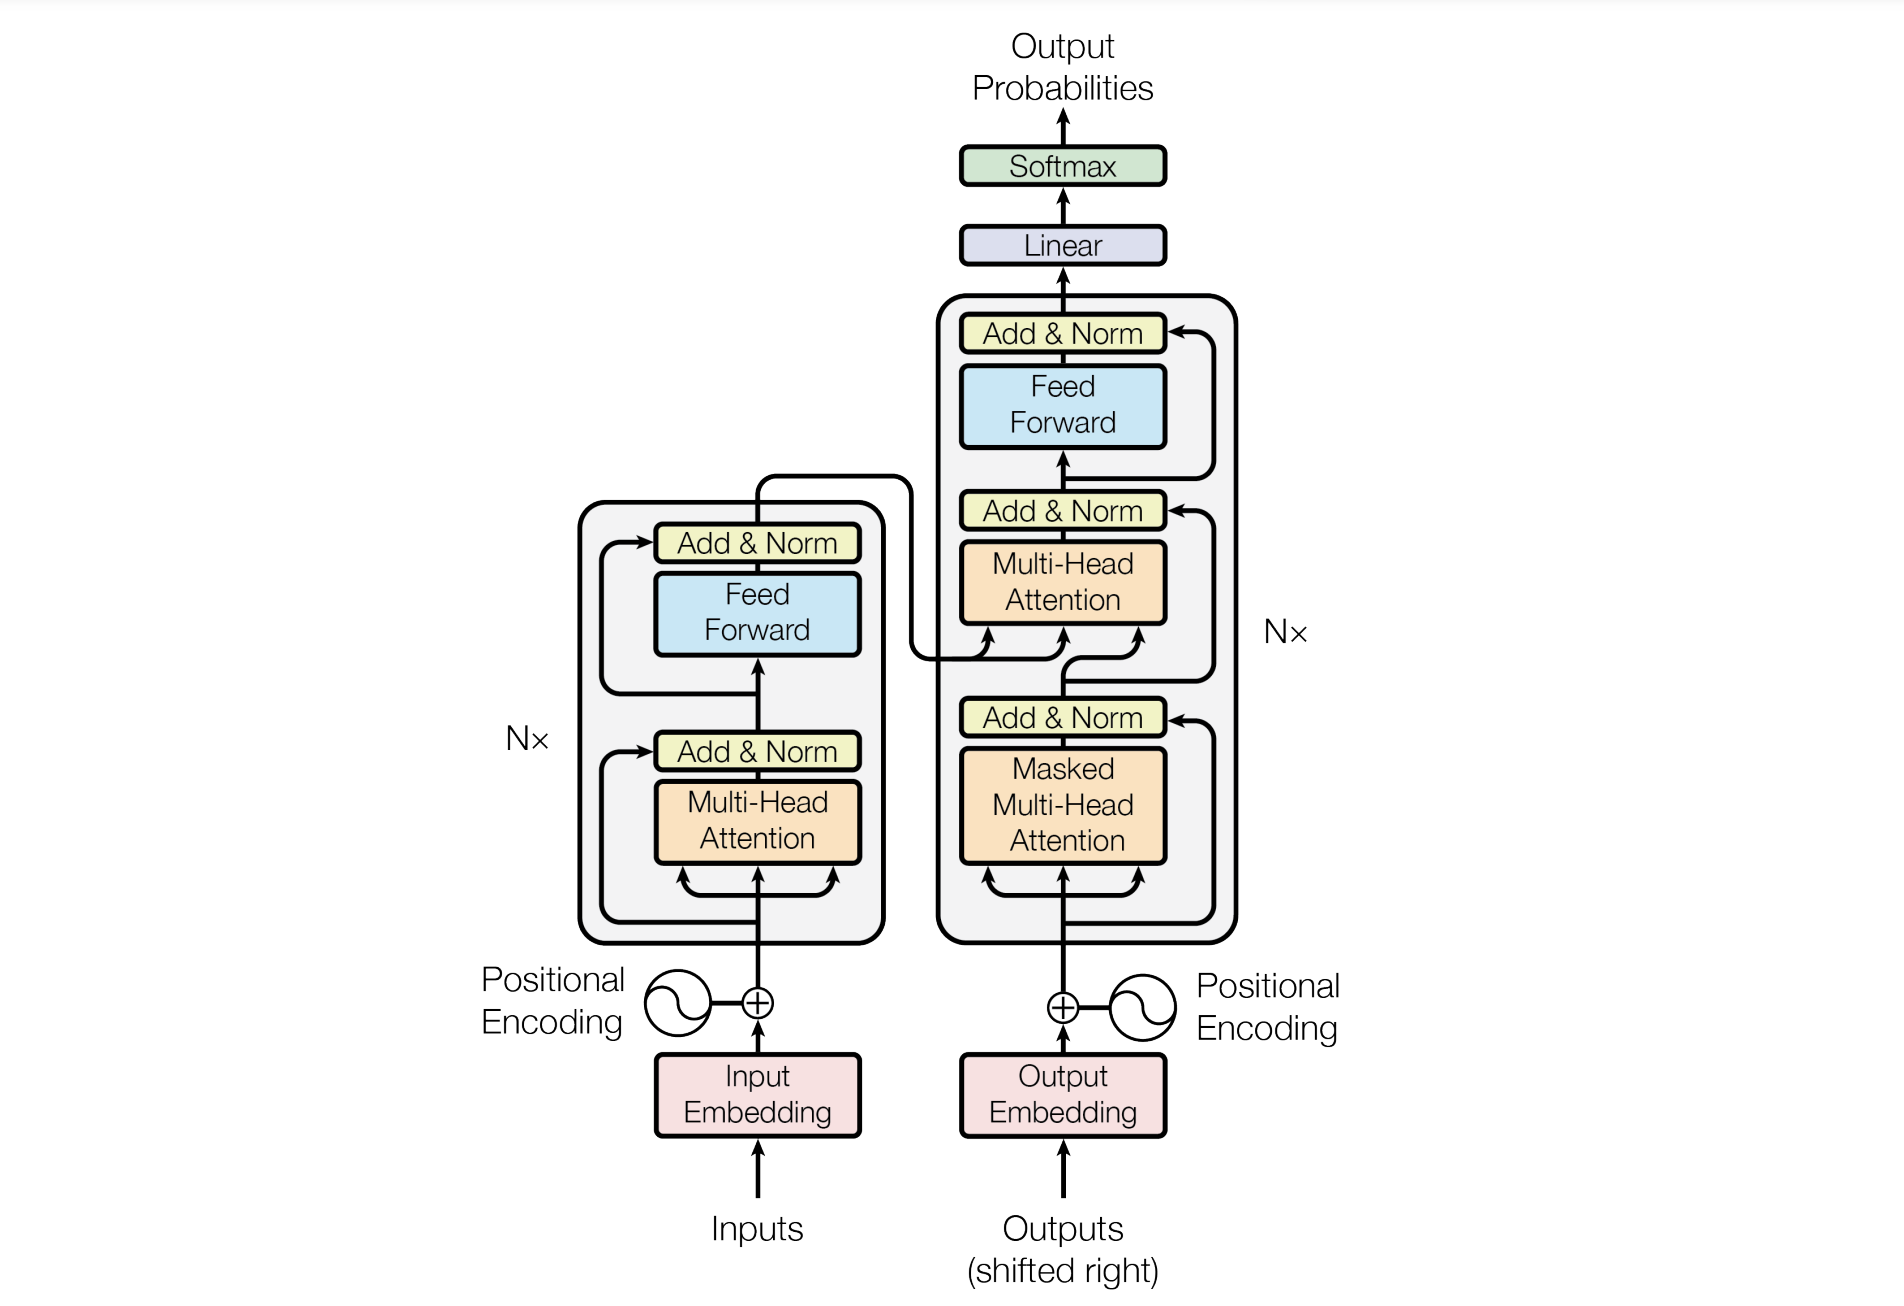

---

## [Exercise] 4.7 -- Encoder

The encoder is the gray box to the left. Now we shall implement one copy of the encoder as shown in the diagram. What is slightly inaccurate is that the "Add & Norm" module contains an additional dropout, so it should really have been named "Dropout & Add & Norm". The flow is as follows:

(1) The input is a `[B, L, D]` tensor that has been embedded and modified with positional encoding.

(2) The same input is used as `Q`, `K`, and `V`, and fed into the multi-headed attention, without any masking. Note that the multi-headed magic happends here, and the output of the multi-headed attention has already been stitched back together. At this point, the output tensor's shape remains as `[B, L, D]`.

(3) The output from the previous step goes through a dropout module, then added to the original input (see the bypass arrow), and finally layer-normalized (use `nn.LayerNorm`).

(4) The output from the previous step is sent to the previously-implemented `FeedForward` module.

(5) The output from the previous step goes through a dropout module, then added to the output of step (3) (see the bypass arrow), and finally layer-normalized (use `nn.LayerNorm`).

Beware that we have two `nn.LayerNorm` modules but one `nn.Dropout` module. Why? Because the latter have
no trainable parameters and hence can be shared, whereas `LayerNorms` have weights and thus must be
treated as distinct modules.

** Note: the verify_encoder() function currently only verify the shape but not the content :(

In [ ]:
# FIXME

class EncoderLayer(nn.Module):
    def __init__(self, D, H, D_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attention = 0 # FIXME
        self.feed_forward = 0 # FIXME
        self.norm1 = 0 # FIXME
        self.norm2 = 0 # FIXME
        self.dropout = 0 # FIXME
        
    def forward(self, x, mask):
        return 0 # FIXME

In [ ]:
def verify_encoder():

    torch.manual_seed(42)
    encoder = EncoderLayer(8, 4, 512, 0.1)
    source = torch.arange(0, 96, dtype=torch.float).reshape([1, 12, 8])
    output = encoder(source)
    expected_output = torch.tensor([[[ 0.5762, -0.6034, -1.0468,  0.4817,  0.4329, -0.9277, -0.9290,
           2.0162],
         [ 0.0854, -2.1007, -0.9340,  0.0277,  0.5643,  0.3290,  0.6805,
           1.3478],
         [ 0.3421, -1.7681, -0.8525, -0.2696,  0.6046, -0.4651,  0.7175,
           1.6913],
         [-0.2673, -1.2814, -1.4382, -0.3111,  0.5940,  0.2133,  0.6879,
           1.8027],
         [ 0.2549, -1.8962, -1.2035, -0.2756,  0.6822,  0.4724,  0.6716,
           1.2943],
         [ 0.2053, -1.8633, -0.5447, -0.5181,  1.1194,  0.8945,  1.2529,
          -0.5459],
         [-0.4650, -1.7856, -0.2822, -0.0855, -0.6335,  0.6044,  0.9789,
           1.6684],
         [ 0.1929, -2.1276, -0.7803, -0.3192,  0.5894,  0.4519,  0.6900,
           1.3029],
         [ 0.1802, -2.1396, -0.5653, -0.3975,  0.2714,  0.4724,  0.7409,
           1.4375],
         [ 0.2608, -1.8195, -0.5088, -0.4074,  0.7563,  0.6471, -0.6113,
           1.6829],
         [-0.0986, -2.1989, -0.4897, -0.2996,  0.6097,  0.4313,  0.7269,
           1.3189],
         [ 0.2976, -1.7122, -0.6534, -1.2018,  0.6852,  0.5508,  0.6512,
           1.3825]]])
    if output.shape != expected_output.shape or \
            False: # FIXME torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_encoder() **")

verify_encoder()

---

## [Exercise] 4.8 -- Decoder

This is almost identical to the encoder, but slightly more complicated.

(1) The input is a `[B, L, D]` tensor that has been embedded and modified with positional encoding.

(2) The same input is used as `Q`, `K`, and `V`, and fed into the multi-headed attention. This time, you
need to use a causality-mask.

(3) The output from the previous step goes through a dropout module, then added to the original input (see the bypass arrow), and finally layer-normalized (use `nn.LayerNorm`).

(4) The output from the previous step got fed into the cross attention as the query `Q`, whereas
`encoder_output` (which was passed in) is used as both `K` and `V` (see the diagram). Cross attention
does not need any masking.

(5) Another round of dropout, addition, and layer normalization.

(6) The output from the previous step is sent to the previously-implemented FeedForward module.

(7) Another round of dropout, addition, and layer normalization.

Hopefully you are getting the gist of this process?

** Note: the verify_decoder() function currently only verify the shape but not the content :(

In [ ]:
# FIXME

class DecoderLayer(nn.Module):
    def __init__(self, D, H, D_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attention = 0 # FIXME
        self.cross_attention = 0 # FIXME
        self.feed_forward = 0 # FIXME
        self.norm1 = 0 # FIXME
        self.norm2 = 0 # FIXME
        self.norm3 = 0 # FIXME
        self.dropout = 0 # FIXME
        
    def forward(self, x, encoder_output, self_mask, cross_mask):
        attn_output = 0 # FIXME

In [ ]:
def verify_decoder():

    torch.manual_seed(42)
    encoder = EncoderLayer(8, 4, 512, 0.1)
    decoder = DecoderLayer(8, 4, 512, 0.1)
    
    source = torch.arange(100, 196, dtype=torch.float).reshape([1, 12, 8])
    target = torch.arange(0, 96, dtype=torch.float).reshape([1, 12, 8])
    
    encoder_output = encoder(source)
    causality_mask = generate_causality_mask(target)
    output = decoder(target, encoder_output, causality_mask)
    expected_output = torch.tensor([[[-1.2194, -0.8877, -0.8026,  0.6160, -0.9453,  0.7488,  1.5156,
           0.9746],
         [-0.1498, -1.0341, -1.4889,  0.0059, -0.7573,  1.3584,  0.7692,
           1.2964],
         [-1.5095, -0.4470, -1.2332,  0.2313, -0.1101,  1.7068,  0.4629,
           0.8987],
         [ 0.9942, -0.6095, -1.8409, -0.3147,  0.4359,  1.4783, -0.6907,
           0.5473],
         [ 0.9621, -0.3903, -1.8374, -0.5268,  0.5258,  1.1402, -0.8544,
           0.9808],
         [ 1.1269, -0.5522, -1.7475, -0.4149,  0.9871,  1.1282, -0.9014,
           0.3738],
         [ 1.3428, -0.0837, -1.8869, -0.3617,  0.7708,  1.1620, -0.7054,
          -0.2379],
         [ 1.7143,  0.1166, -1.6716, -0.0446, -0.5684,  1.2267, -0.6361,
          -0.1368],
         [ 1.5492, -0.7092, -0.9928, -0.4902,  1.0260,  1.2030, -1.0311,
          -0.5548],
         [ 1.4449,  0.1218, -1.6833, -0.5653,  0.9548,  0.9817, -0.8295,
          -0.4251],
         [ 1.0121, -0.7248, -2.0945, -0.5780,  0.9053,  0.7150,  0.6125,
           0.1523],
         [ 1.4806,  0.1730, -1.6805, -0.6377,  1.0146,  0.8628, -0.7439,
          -0.4688]]])
    if output.shape != expected_output.shape or \
            False: # FIXME torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_decoder() **")

verify_decoder()

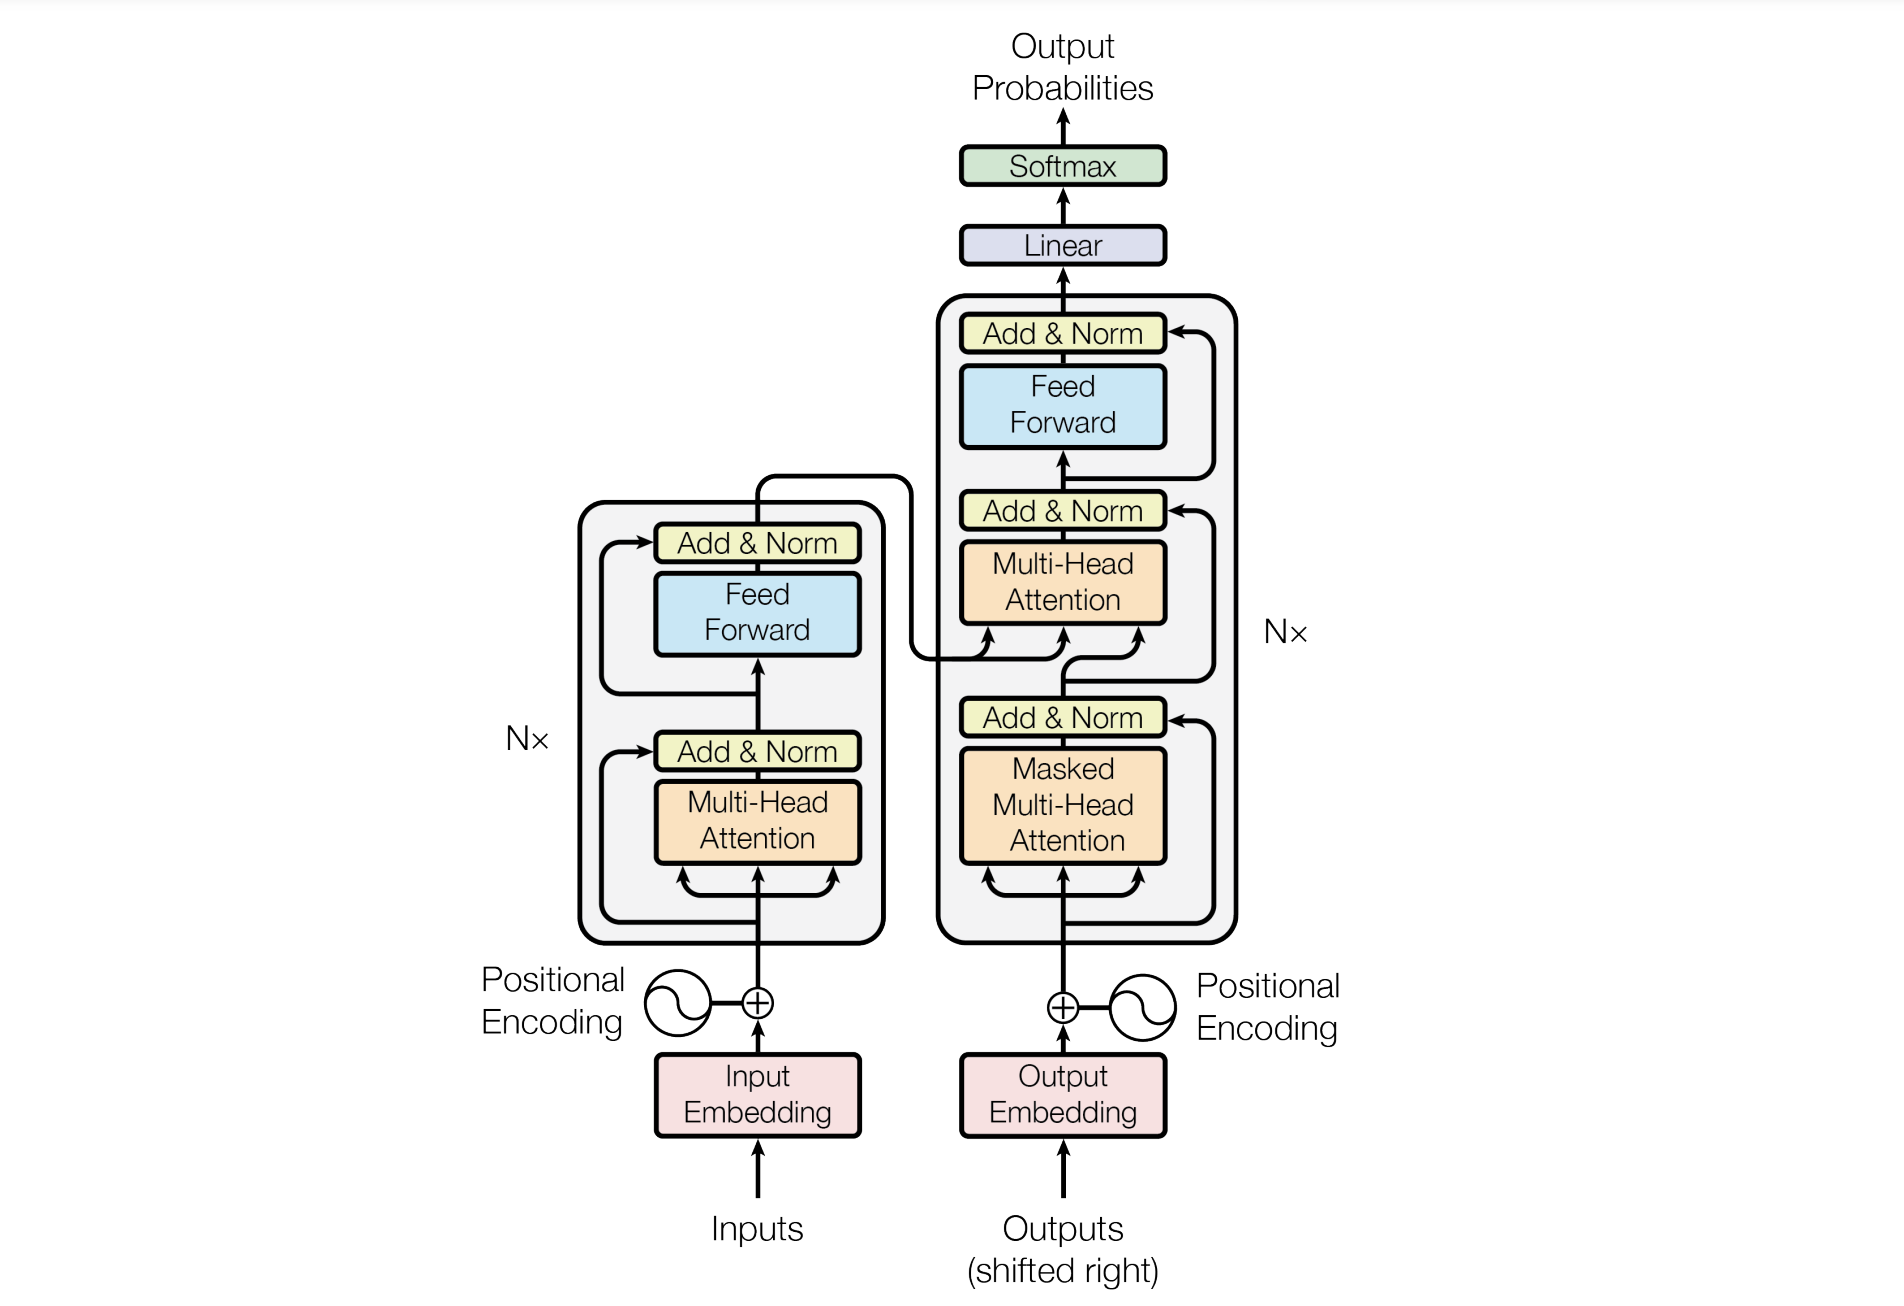

---

## [Exercise] 4.9 -- Transformer

We are finally ready to put everything together, using the modules we have implement earlier. By now,
hopefully, it would not be difficult to do it.

---

The following are instructions for the constructor:

(1) First, the transformer need to be initialized with the following parameters:

```
    source_vocab_size
    target_vocab_size
    D -- dimension of the embedding
    H -- number of heads
    Nx -- number of stacked encoders and decoders (see diagram)
    D_ff -- output dimension of the feed-forward
    maxL -- maximum sequence length
    dropout -- dropout factor
```   

  You also need to instantiate the modules used accordingly. For your convenience, I have listed them
  in the `__init__()` function, but you do need to properly initialize them.
  
  
(2) `encoder_embedding` should be initialized with `source_vocab_size` as the first parameter, and`decoder_embedding` should be initialized with `target_vocab_size` as the first parameter.

(3) Note that the number of `encoder_layers` and `decoder_layers` are determined by the `Nx`
parameter. As such, we cannot hard-code the layers but instead must use lists. However,
as mentioned in the tutorial, you need to use `nn.ModuleList` instead of just Python list so that
PyTorch can see them as optimizable. To be clear, you will make `Nx` copies of the encoder and
`Nx` copies of the decoder -- i.e. you cannot share the module, as the weights of each encoder
(and decoder) are uniquely and separately optimized.

(4) The input to the transformer `forward()` function is simply `source` and `target`. You
should know by now that both are tensors of shape `[B, L]`, where `L <= maxL`. Note that
the parameter `maxL` is used in the constructor of the positional encoder, but you're allowed
to pass in tensors with the length dimension smaller than `maxL`.

(5) Now look at the diagram carefully. Make sure you initialize each of the module properly
with the right arguments. Note that the parameters `H` (number of heads) and `D_ff` (output
dimension of the feedforward) are needed by both the encoder layers and the decoder layers.

(6) The role of the `fc` module, which is a fully-connected `nn.Linear` module
after the encoder stack, is to project the embeddings (of dimension `D`)
to the target vocabulary (of dimension `target_vocab_size`). In short, for each target token,
we convert the target embedding of the corresponding token
to some kind of unweighted scores.

---

The following are instructions for the `forward()` function.

(7) `nn.Dropout` is a module that is used at two places (see below). However, since it is parameter-less,
you can use it at multiple places without any repercussion. Furthermore,
`positional_encoding` is also parameter-less and therefore can be shared.

(7) On the encoder side, you need to take the source tensor, apply the source embedding,
    apply the positional encoding, and apply dropout (this is needed and described in the paper
    but not explicitly shown in the diagram). Let the output be called `encoder_output`.
    
(8) On the decoder side, you need to take the target tensor, apply the target embedding,
    apply the positional encoding, and apply dropout (this is needed and described in the paper
    but not explicitly shown in the diagram). Let the output be called `decoder_output`.
    
(9) Call `generate_causality_mask(target)` to generate the causality mask.

(10) Take `encoder_output` and feed it through the stack of `Nx` encoders, each call of
which not only take the previous `encoder_output`. Let
the final encode output be called `C` (the source context, see Part III).

(11) Take `decoder_output` and feed it through the stack of `Nx` decoders, each call of
which not only take the previous `decoder_output`, but also the causality maak,
as well as `C`, which is the very last encoder output.

(12) Take `decoder_output` and apply `fc` to get the unweighted likelihood measurement.

(13) That's it! There is no need for the `softmax` here (we'll explain why later).

---

At first glance, this may look overwhelming, but we have just describe how to translate the diagram
to actual PyTorch code. The diagram actually did a very good job conveying all the details
necessarily to implement the transformer module, with only two minor details:

(a) The use of `nn.Dropout` after positional encoding and before encoding or decoding.

(b) The omission of the `softmax` module, which is actually not a bug but a feature --
the `softmax` is calculated as part of the loss function `CrossEntropyLoss()`.

** Note: the verify_transformer() function currently only verify the shape but not the content :(

In [ ]:
# FIXME

class Transformer(nn.Module):
    def __init__(self, source_vocab_size, target_vocab_size, D,
                H, Nx, D_ff, maxL, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = 0 # FIXME
        self.decoder_embedding = 0 # FIXME
        self.positional_encoding = 0 # FIXME
        self.encoder_layers = 0 # FIXME
        self.decoder_layers = 0 # FIXME
        self.fc = 0 # FIXME
        self.dropout = 0 # FIXME
    
    def forward(self, source, target):
        return 0 # FIXME

In [ ]:
def verify_transformer():

    torch.manual_seed(42)
    source_vocab_size = 10
    target_vocab_size = 10
    D = 8
    H = 2
    Nx = 6
    D_ff = 20
    maxL = 100
    dropout = 0.1
    transformer = Transformer(source_vocab_size, target_vocab_size,
                              D, H, Nx, D_ff, maxL, dropout)
    B = 2
    Ls = 5
    Lt = 5
    source = torch.randint(1, source_vocab_size, (B, Ls))  
    target = torch.randint(1, source_vocab_size, (B, Lt))  
    output = transformer(source, target)
    expected_output = torch.tensor([[[ 1.2637, -1.2294,  0.2417,  0.1209, -0.3542,  0.4997, -0.8134,
           0.0673, -0.0027,  0.0205],
         [ 0.7656, -0.0395, -0.3658, -0.2799, -1.2464,  0.4382, -0.3345,
          -0.7046,  0.2030,  0.2935],
         [ 0.9448, -1.0114,  0.5522, -0.4954, -0.7464,  0.1261, -0.4729,
          -0.0512,  0.2308, -0.3556],
         [ 1.3371, -0.7485, -0.0671, -0.0582, -1.0672,  0.6028, -0.7285,
          -0.4926,  0.0692,  0.1587],
         [ 1.1082, -0.3944, -0.6571,  0.3137, -0.8469,  0.9551, -0.8199,
          -0.2551,  0.1223,  0.7416]],

        [[ 0.6412,  0.5002, -0.2971, -0.4550, -1.1884,  0.7841, -0.5566,
          -0.6515,  0.1819,  0.2816],
         [ 1.0129, -0.9239,  0.3055, -0.2479, -0.8097,  0.3372, -1.0252,
          -0.4146,  0.0477, -0.0251],
         [ 1.2067, -0.5949, -0.4990,  0.2367, -0.9443,  0.8509, -1.0912,
          -0.4610,  0.0049,  0.6044],
         [ 0.9175, -0.6736, -0.5932,  0.2163, -0.8875,  0.6833, -1.1990,
          -0.3715,  0.0667,  0.7133],
         [ 1.4838, -0.4566, -0.4166,  0.3582, -0.7404,  1.0352, -0.9805,
          -0.5391, -0.2400,  0.4358]]])
    if output.shape != expected_output.shape or \
            False: # FIXME torch.max(torch.abs(output - expected_output)) > 1e-04:
        print(f'         output.shape = {output.shape}')
        print(f'               output = {output}')
        print(f'expected_output.shape = {expected_output.shape}')
        print(f'      expected_output = {expected_output}')
        print("** failed (mismatched output) **")
        return
    
    print("** passed verify_transformer() **")

verify_transformer()

---

## [Exercise] 4.10 -- Training

Congratulations! We have completed the implementation of transformer. That's all the code you need to write. The following is some training code to test the transformer. No need to code anything below.

In [ ]:
source_vocab_size = 5000
target_vocab_size = 5000
D = 48
H = 3
Nx = 3
D_ff = 128
maxL = 20
dropout = 0.1

transformer = Transformer(source_vocab_size, target_vocab_size,
                         D, H, Nx, D_ff, maxL, dropout)

In [ ]:
B = 64
Ls = maxL  # arbitrary, but must be > 0 and <= maxL
Lt = maxL  # arbitrary, but must be > 0 and <= maxL
source_data = torch.randint(1, source_vocab_size, (B, Ls))  
target_data = torch.randint(1, target_vocab_size, (B, Lt))

# generate a [B, L] tensor whose values are [1, source_vocab_size)
# generate a [B, L] tensor whose values are [1, target_vocab_size)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
    # Hardy: basically, CrossEntropyLoss() compares the output tensor to
    # the target. Conceptually, say we are to compare a K-dimensional
    # vector to an index, where K corresponds to the size of the vocab,
    # which we'll do a softmax. Then, we'll simply take the value of the
    # softmax at the given index, and take a negative log. We do that to
    # all outputs, and take the average. That's the cross entropy loss.
    #
    # For example, let's say K = 4, and the tensor is
    # tensor([0.5, 0.6, 0.7, 0.8]). Note that they don't need to sum to
    # one. Then softmax gives tensor([0.2138, 0.2363, 0.2612, 0.2887]),
    # which sum to one. Let the target index be 2, so the cross entropy
    # is -np.log(0.2612) = 1.342468881579861. The higher the confidence,
    # the lower the cross entropy. These are some reference numbers:
    #    -np.log(0.1) = 2.30
    #    -np.log(0.5) = 0.69
    #    -np.log(0.8) = 0.22
    #    -np.log(0.9) = 0.11
    #    -np.log(0.95) = 0.05
    #    -np.log(0.99) = 0.01

optimizer = optim.Adam(transformer.parameters(),
                      lr=1e-4, betas=(0.9, 0.98), eps=1e-9)
    # Hardy: these are hyperparameters used in the Attention paper
    
transformer.train()
for epoch in tqdm(range(5001)):
    optimizer.zero_grad()
    output = transformer(source_data, target_data[:, :-1])
    loss = criterion(output.reshape(
        -1, target_vocab_size), target_data[:, 1:].reshape(-1))
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        tqdm.write(f'Epoch: {epoch+1}, Loss: {loss.item()})')